In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from scipy.stats import skew

In [168]:
# import numpy as np
# print(np.__version__)


# Exploratory Data Analysis (EDA)

## description of the features

| Feature                | Description                                                                                                          |
|------------------------|----------------------------------------------------------------------------------------------------------------------|
| ID                     | Patient ID                                                                                                           |
| Status                 | 0 = no diabetes, 1 = prediabetes or diabetes                                                                         |
| HighBP                 | 0 = no high BP, 1 = high BP                                                                                          |
| HighChol               | 0 = no high cholesterol, 1 = high cholesterol                                                                        |
| CholCheck              | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                            |
| BMI                    | Body Mass Index                                                                                                      |
| Smoker                 | 0 = no, 1 = yes (Have smoked at least 100 cigarettes in their entire life)                                           |
| Stroke                 | 0 = no, 1 = yes (Ever told they had a stroke)                                                                        |
| HeartDiseaseorAttack   | 0 = no, 1 = yes (coronary heart disease (CHD) or myocardial infarction (MI))                                         |
| PhysActivity           | 0 = no, 1 = yes (Physical activity in the past 30 days, not including job)                                           |
| Fruits                 | 0 = no, 1 = yes (Consume fruit 1 or more times per day)                                                              |
| Veggies                | 0 = no, 1 = yes (Consume vegetables 1 or more times per day)                                                         |
| HvyAlcoholConsump      | 0 = no, 1 = yes (Heavy drinkers: men >14 drinks/week, women >7 drinks/week)                                          |
| AnyHealthcare          | 0 = no, 1 = yes (Have any kind of health care coverage)                                                              |
| NoDocbcCost            | 0 = no, 1 = yes (Was there a time in the past 12 months when you needed to see a doctor but could not because of cost)|
| GenHlth                | Scale 1-5 (1 = excellent, 5 = poor)                                                                                  |
| MentHlth               | Scale 1-30 days (Days mental health was not good in the past 30 days)                                                |
| PhysHlth               | Scale 1-30 days (Days physical health was not good in the past 30 days)                                              |
| DiffWalk               | 0 = no, 1 = yes (Do you have serious difficulty walking or climbing stairs?)                                         |
| Sex                    | 0 = female, 1 = male                                                                                                  |
| Age                    | 13-level age category (1 = 18-24, 9 = 60-64, 13 = 80 or older)                                                        |
| Education              | Scale 1-6 (1 = Never attended school or only kindergarten, 6 = College 4 years or more)                              |
| Income                 | Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more)                                        |
| ExtraMedTest           | The result of an extra medical test, range (-100, 100)                                                               |
| ExtraAlcoholTest       | The result of an extra alcohol test, range (-100, 100)                                                               |

In [2]:
df_train = pd.read_csv('data_train.csv')

In [3]:
df_train.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [5]:
# check if the datasets have null values
pd.isna(df_train).sum()

Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

In [26]:
df_train.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


**Note** : At first, *'Id'*, does not contribute to the prediction for diabetes, hence I will drop this column.

In [6]:
# drop 'Id', 'Sex' and 'Status' column
df_train_complete = df_train.copy()
if 'Id' in df_train.columns:
    df_train_complete.drop('Id', axis=1, inplace=True)

# if 'Status' in df_train.columns:
#     df_train_complete.drop('Status', axis=1, inplace=True)

In [7]:
df_train_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-n

# Data Distribution

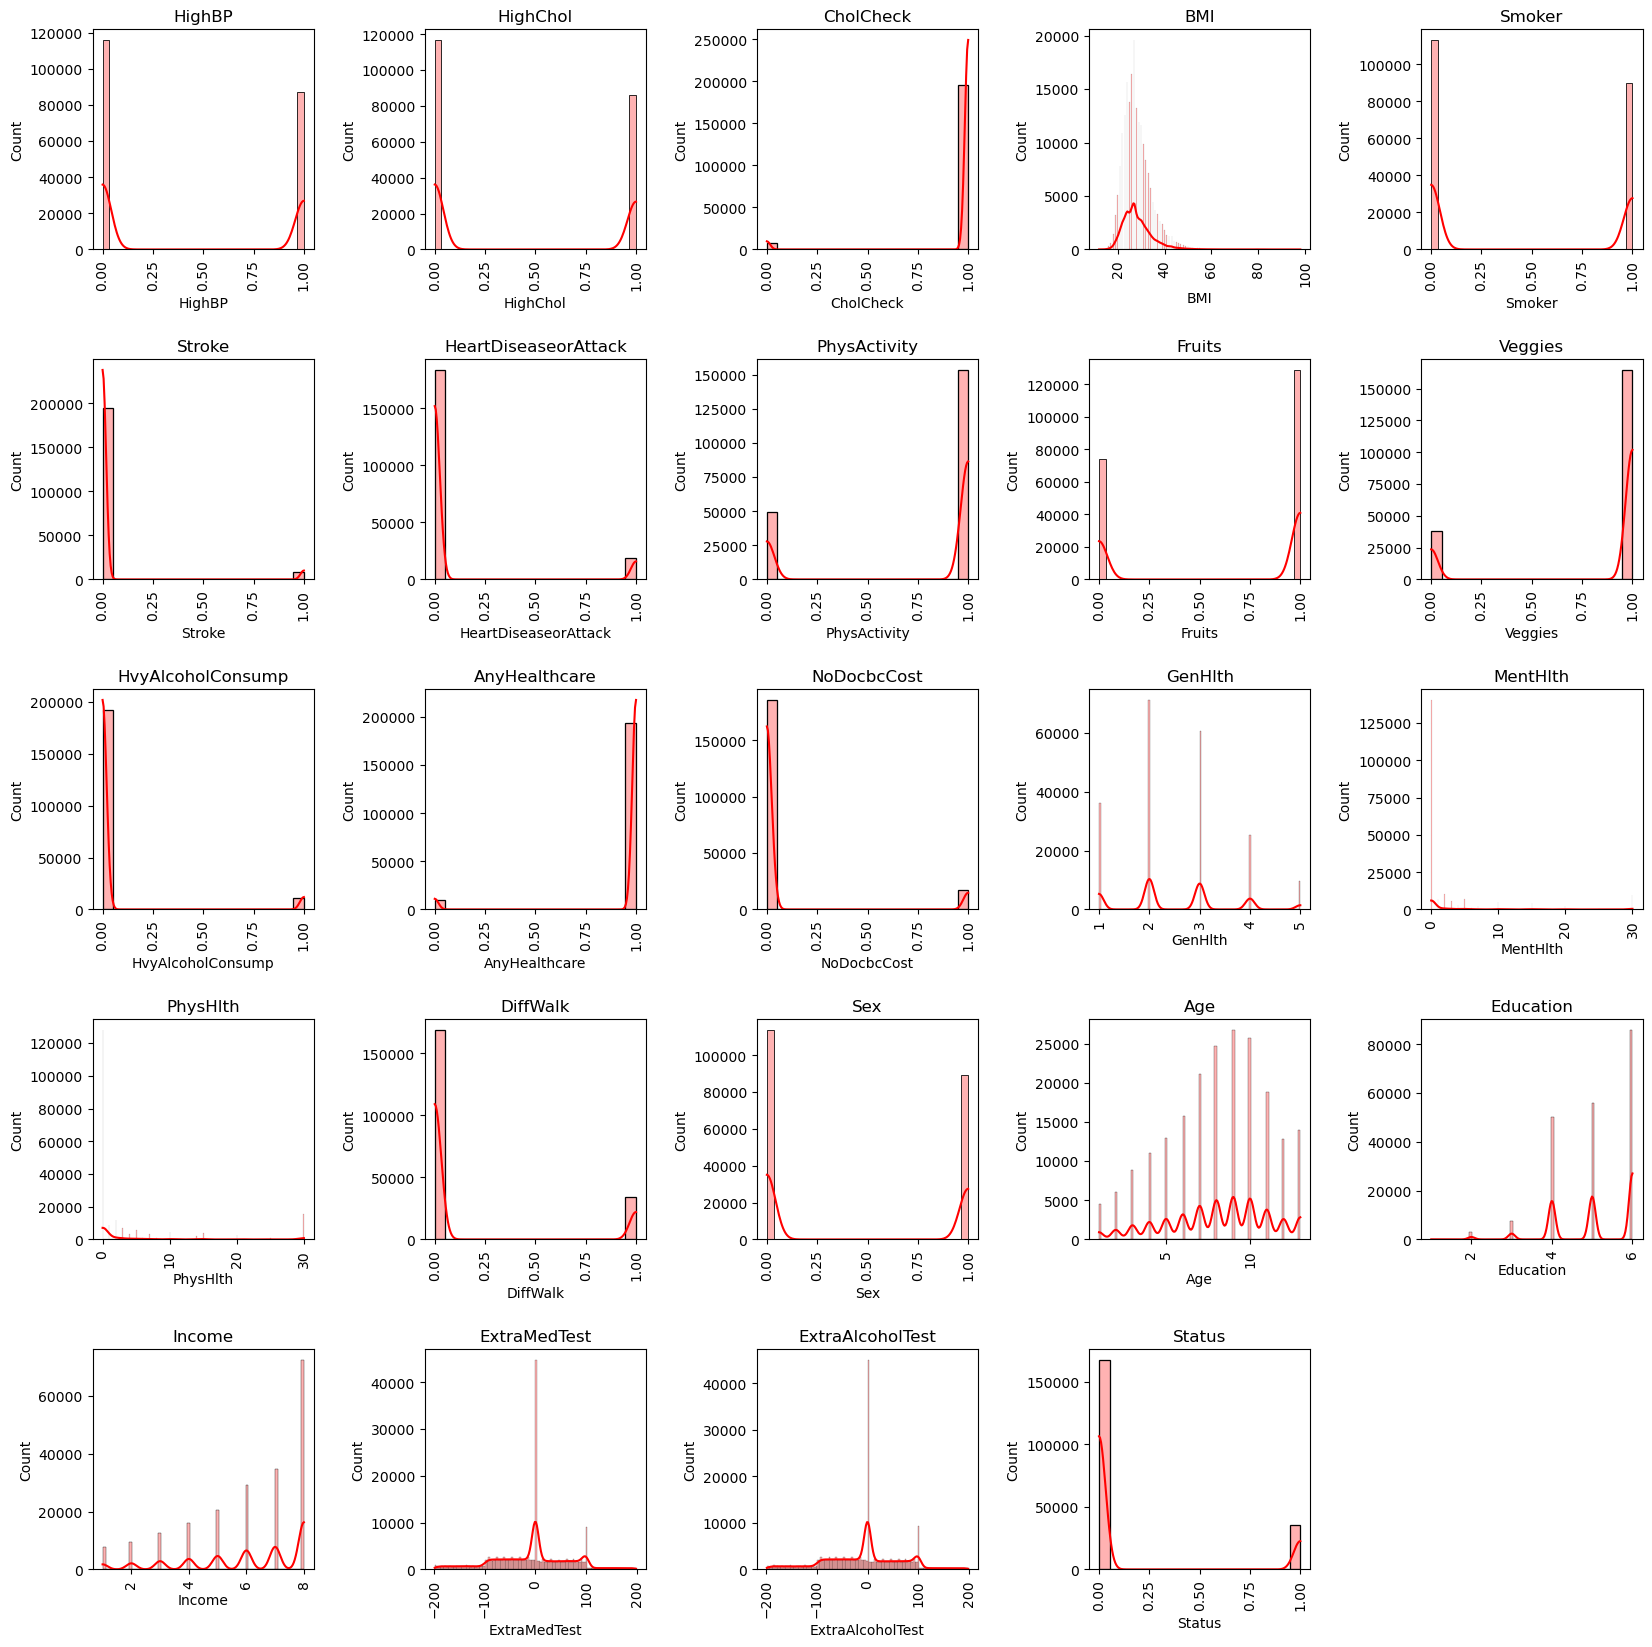

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the entire figure
plt.figure(figsize=(20, 20))

for i, col in enumerate(df_train_complete.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(df_train[col], kde=True, color='r', alpha=0.3)
    plt.title(col)
    plt.xticks(rotation='vertical')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.show()

The above picture is difficult to see due to the **large** amount of datasets. Hence, another plot is supplied to get a clear picture of data distribution.

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# numeric_columns = df_train_complete.select_dtypes(include='number').columns
# num_plots = len(numeric_columns)

# num_cols = 2
# num_rows = math.ceil(num_plots / num_cols)

# plt.figure(figsize=(15, 5*num_rows))

# for i, c in enumerate(numeric_columns):
#     plt.subplot(num_rows, num_cols, i+1)
#     sns.histplot(df_train_complete[c], kde=True, stat='density', alpha=0.7)
#     plt.title(c)
#     plt.xlabel('')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# plt.show()

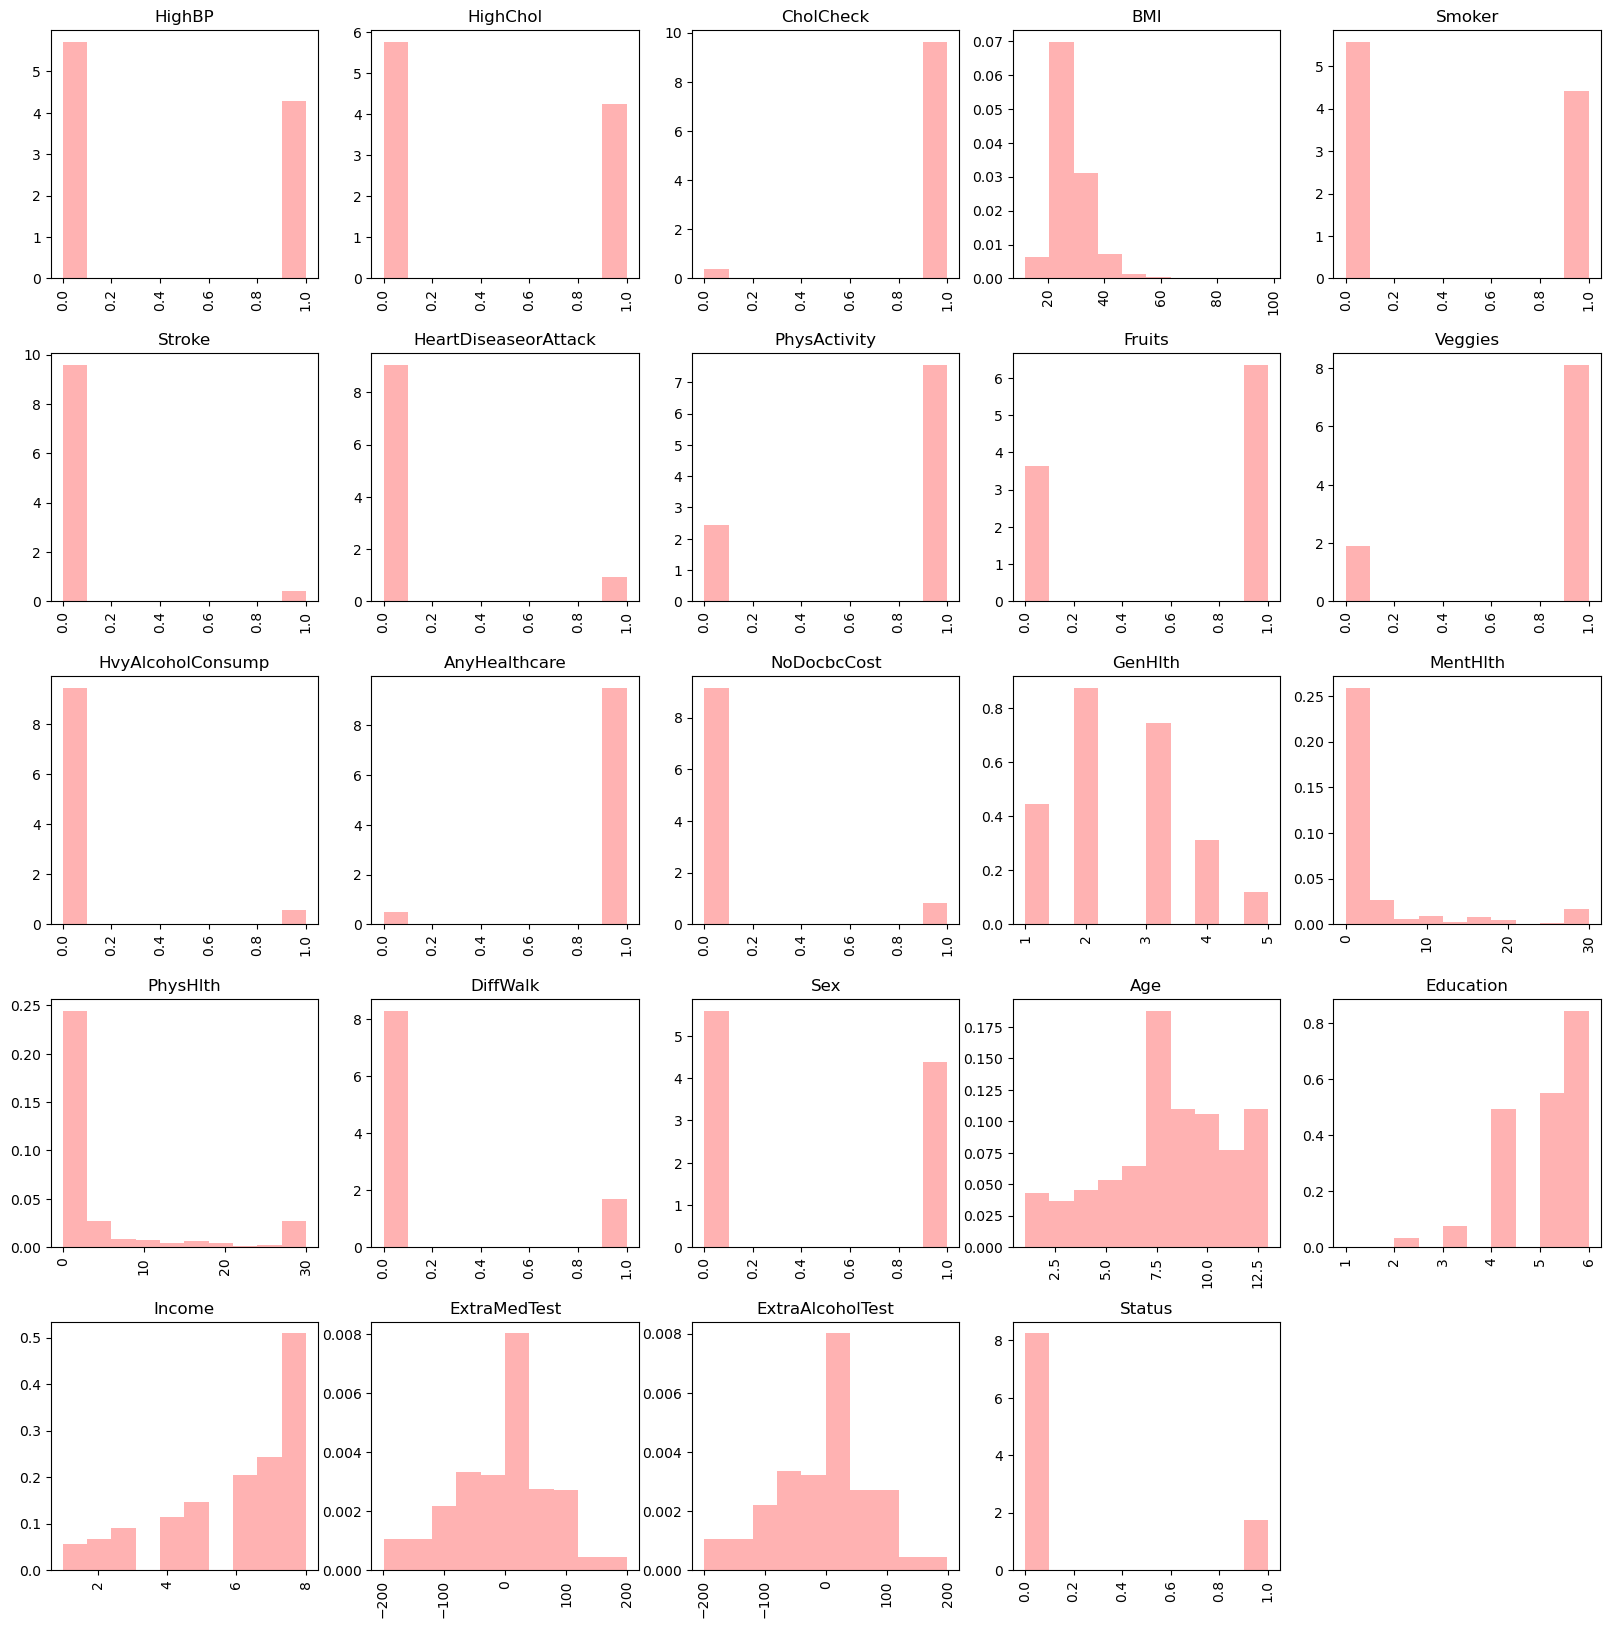

In [9]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df_train_complete.columns):
    plt.subplot(5,5,i + 1)
    plt.hist(df_train[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    
plt.subplots_adjust(wspace=0.2, hspace=0.3)

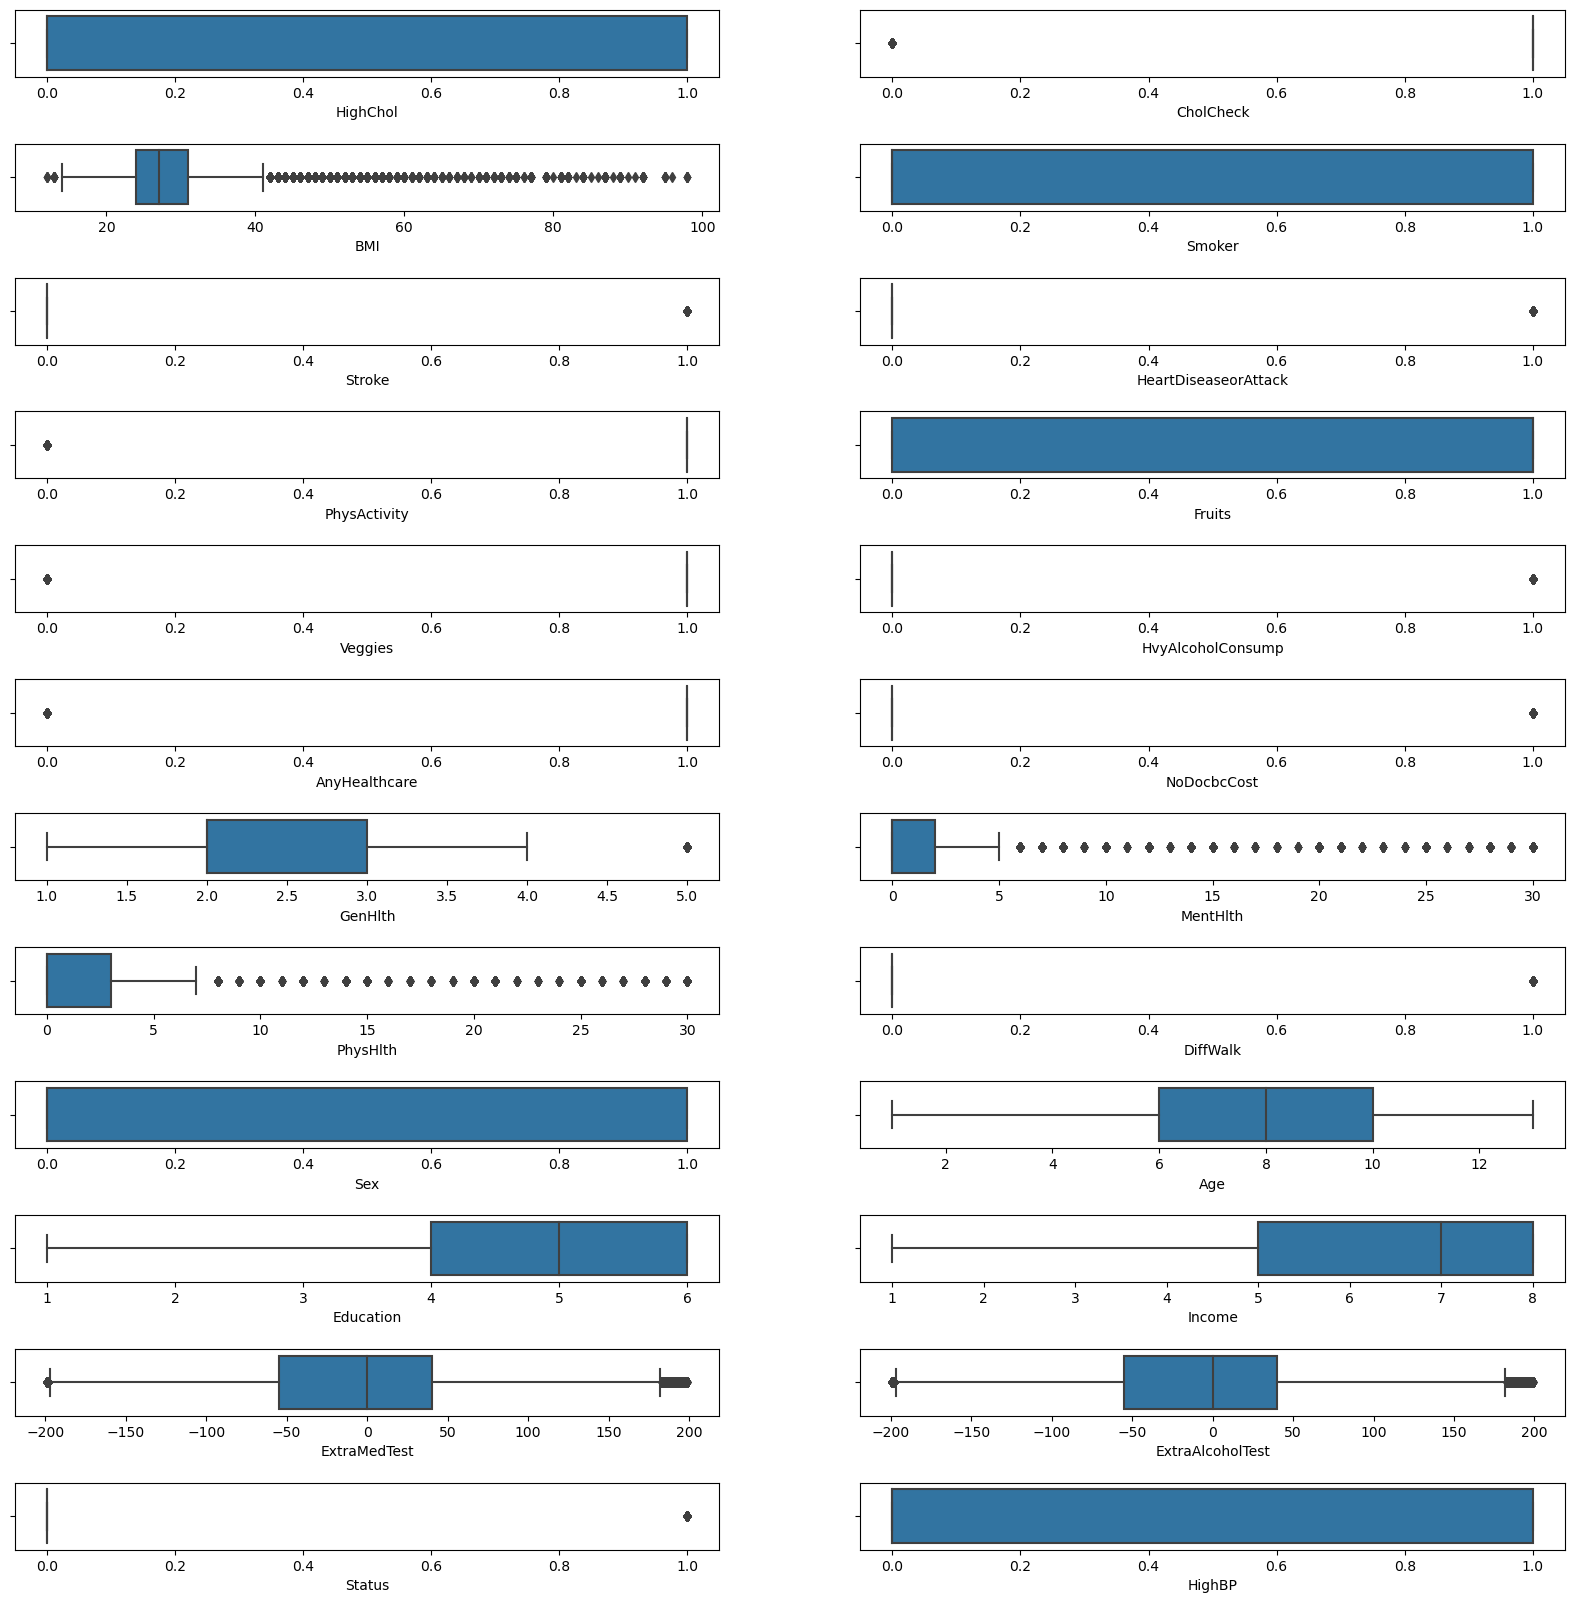

In [10]:
# plot boxplot to examine outliers
fig, ax = plt.subplots(12, 2, figsize=(20,20))
ax = ax.flatten()
for i, v in enumerate(df_train_complete.columns.values):
    sns.boxplot(x = df_train_complete[v], ax=ax[i - 1])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.2, hspace=1)
plt.show()

To filter which columns to apply transformation to handle outliers and skewed columns, I will calculate the skewness for each column. The threshold is initially determined at **-0.75 - 0.75**.

In [11]:
# Calculate skewness for each column
skewness = df_train_complete.apply(lambda x: skew(x.dropna()))  # Drop NA values for skew calculation
skewed_cols = []
# Filter columns with skewness above a threshold (e.g., 0.75)
for col, skew_val in skewness.iteritems():
    if col == 'Status':
        continue
    # print(col, skew_val)
    if df_train_complete[col].nunique() == 2: # skip binary features
        continue
    else:
        skewed_cols.append(col)
print("Skewness for each feature")
print(skewness)
print("---------------")
print("Skewed columns")
print(skewed_cols)

Skewness for each feature
HighBP                  0.288147
HighChol                0.306150
CholCheck              -4.880158
BMI                     2.129208
Smoker                  0.230988
Stroke                  4.639624
HeartDiseaseorAttack    2.774618
PhysActivity           -1.194013
Fruits                 -0.562498
Veggies                -1.593061
HvyAlcoholConsump       3.865809
AnyHealthcare          -4.205698
NoDocbcCost             3.006620
GenHlth                 0.422090
MentHlth                2.715102
PhysHlth                2.201054
DiffWalk                1.769292
Sex                     0.243608
Age                    -0.360331
Education              -0.775346
Income                 -0.893194
ExtraMedTest           -0.145711
ExtraAlcoholTest       -0.141507
Status                  1.705484
dtype: float64
---------------
Skewed columns
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'ExtraMedTest', 'ExtraAlcoholTest']


In [12]:
df_X = df_train_complete

## Data Splitting

We will split the data into train sets and validation sets before applying normalization. Hence we can preserve the validity of our test set as a true unseen dataset, thus prevent data leakage.

**Note**: However, as our datasets is imbalance initially, (class 0.0 appear a majority compared to class 1.0), hence, when splitting, we must ensure that the class distribution is maintained the same as the original datasets.

In [13]:
df_X = df_train_complete.drop('Status', axis = 1)
df_Y = df_train_complete['Status']

In [14]:
# split data 80% train, 20% val
train_X, val_X, train_Y, val_Y = train_test_split(
    df_X, df_Y,
    shuffle=True,
    test_size=0.2, 
    random_state=99, # Reproducible results
    stratify=df_Y  # Ensures class distribution is maintained
)
print(f"train_X shape: {train_X.shape}")
print(f"train_Y shape: {train_Y.shape}")
print(f"val_X shape: {val_X.shape}")
print(f"val_y shape: {val_Y.shape}")

train_X shape: (162355, 23)
train_Y shape: (162355,)
val_X shape: (40589, 23)
val_y shape: (40589,)


In [15]:
df_Y.value_counts()

0    167313
1     35631
Name: Status, dtype: int64

In [16]:
val_Y.value_counts()

0    33463
1     7126
Name: Status, dtype: int64

## Apply Yeo-Johnson Transformation

In [17]:
# Initialize the PowerTransformer with the Yeo-Johnson method
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

train_X[skewed_cols] = power_transformer.fit_transform(train_X[skewed_cols])
val_X[skewed_cols] = power_transformer.transform(val_X[skewed_cols]) # Note: transform only!

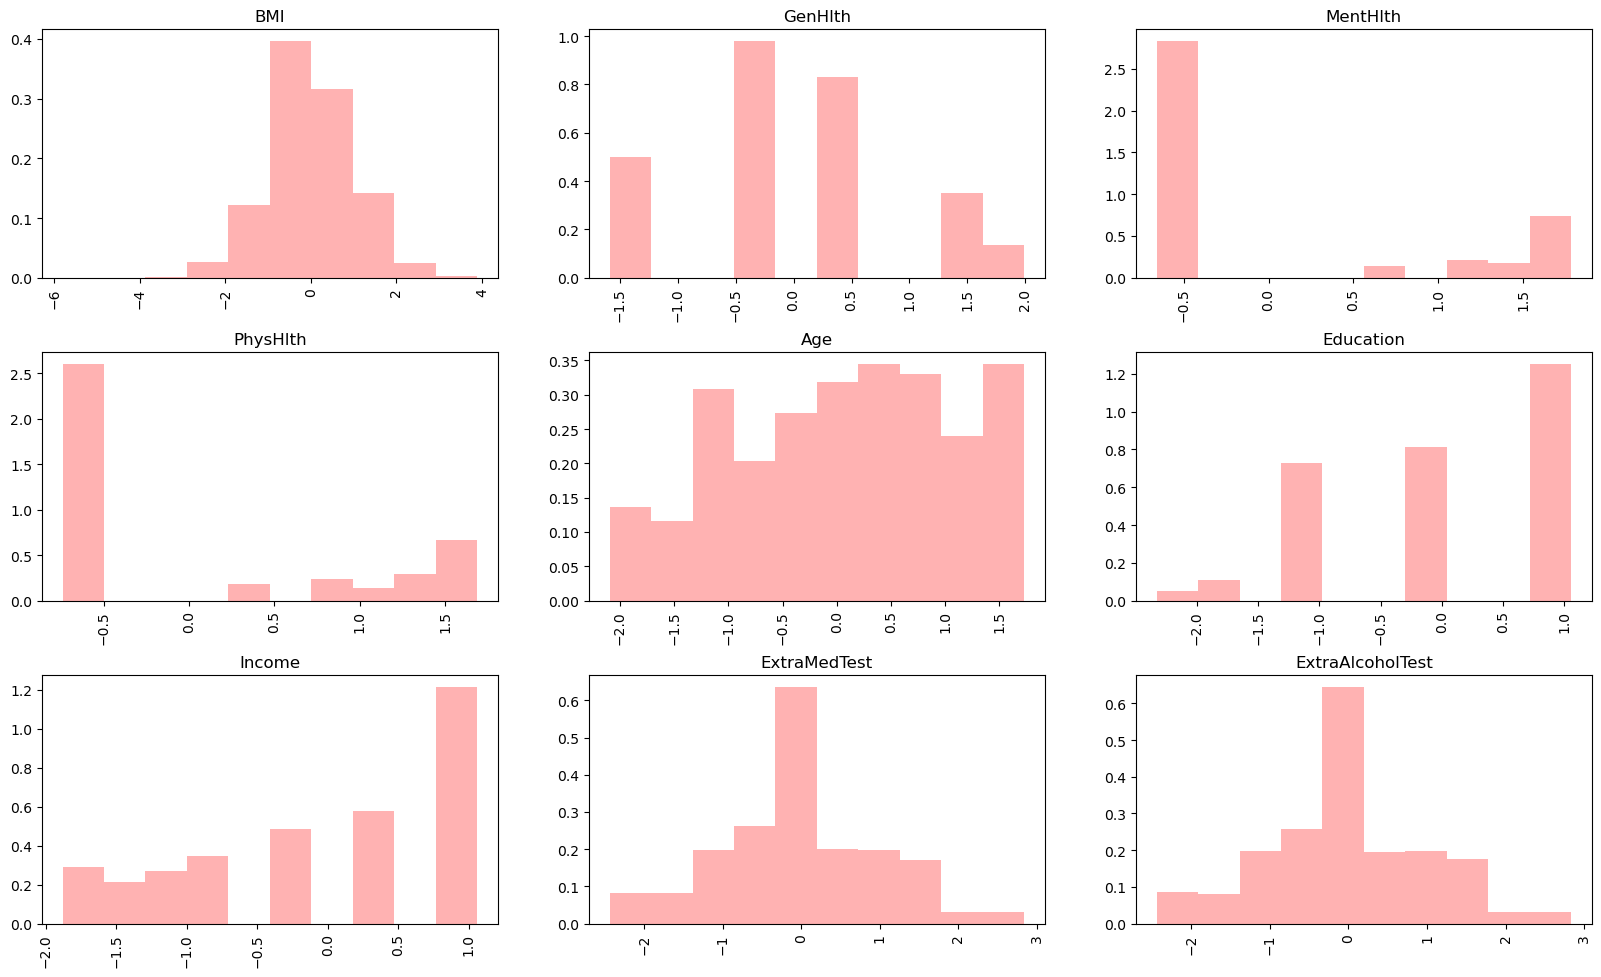

In [18]:
plt.figure(figsize=(20,20))
for i, col in enumerate(skewed_cols):
    plt.subplot(5,3,i + 1)
    plt.hist(train_X[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    
plt.subplots_adjust(wspace=0.2, hspace=0.3)

In [11]:
# df_train_complete.describe()

In [12]:
# df_train_transformed.describe()

In [88]:
# # Calculate skewness for each column
# skewness_trained = train_X.apply(lambda x: skew(x.dropna()))  # Drop NA values for skew calculation
# print("Skewness on train sets")
# print(skewness_trained)


In [38]:
# # plot boxplot to examine outliers
# fig, ax = plt.subplots(3, 2, figsize=(15,15))
# ax = ax.flatten()
# for i, v in enumerate(skewed_cols):
#     sns.boxplot(x = df_train_transformed[v], ax=ax[i - 1])

# plt.show()

## Dealing with class imbalance

<AxesSubplot:xlabel='Status', ylabel='Count'>

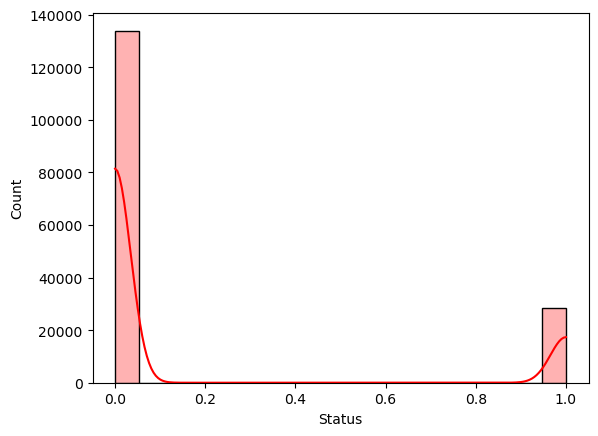

In [19]:
# plot 'Status' columns
sns.histplot(train_Y, kde=True, color='r', alpha=0.3)

There is a class **imbalance** between 0.0 and 1.0 in **Status** column. Hence, the diabetes prediction might become biased which likely to get better peformance on '0.0' Value. To solve this, I will up-sample the 1.0 cases.

# Handle Class Imbalance with SMOTETomek

In [20]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smt.fit_resample(train_X, train_Y)

In [21]:
y_train_balanced.value_counts()

0    133659
1    133659
Name: Status, dtype: int64

In [22]:
# Save our newly processed data into separate datasets
X_train_balanced.to_csv("./data/X_train_balanced.csv", index=False)
y_train_balanced.to_csv("./data/y_train_balanced.csv", index=False)
val_X.to_csv("./data/val_X.csv", index=False)
val_Y.to_csv("./data/val_Y.csv", index=False)

In [23]:
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")
print(f"val_X shape: {val_X.shape}")
print(f"val_y shape: {val_Y.shape}")

X_train_balanced shape: (267318, 23)
y_train_balanced shape: (267318,)
val_X shape: (40589, 23)
val_y shape: (40589,)


In [142]:
# # Separate majority and minority classes
# df_majority = df_train_transformed[df_train_transformed['Status'] == 0]
# df_minority = df_train_transformed[df_train_transformed['Status'] == 1]

# df_upsampled = df_train_transformed.copy()

# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,      # sample with replacement
#                                  n_samples=len(df_majority),    # to match majority class
#                                  random_state=123)  # reproducible results

# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# # Display new class counts
# df_upsampled['Status'].value_counts()

<AxesSubplot:xlabel='Status', ylabel='Count'>

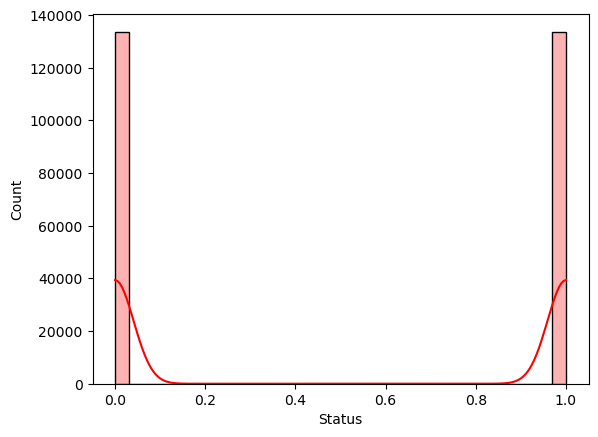

In [24]:
# plot 'Status' columns
sns.histplot(y_train_balanced, kde=True, color='r', alpha=0.3)

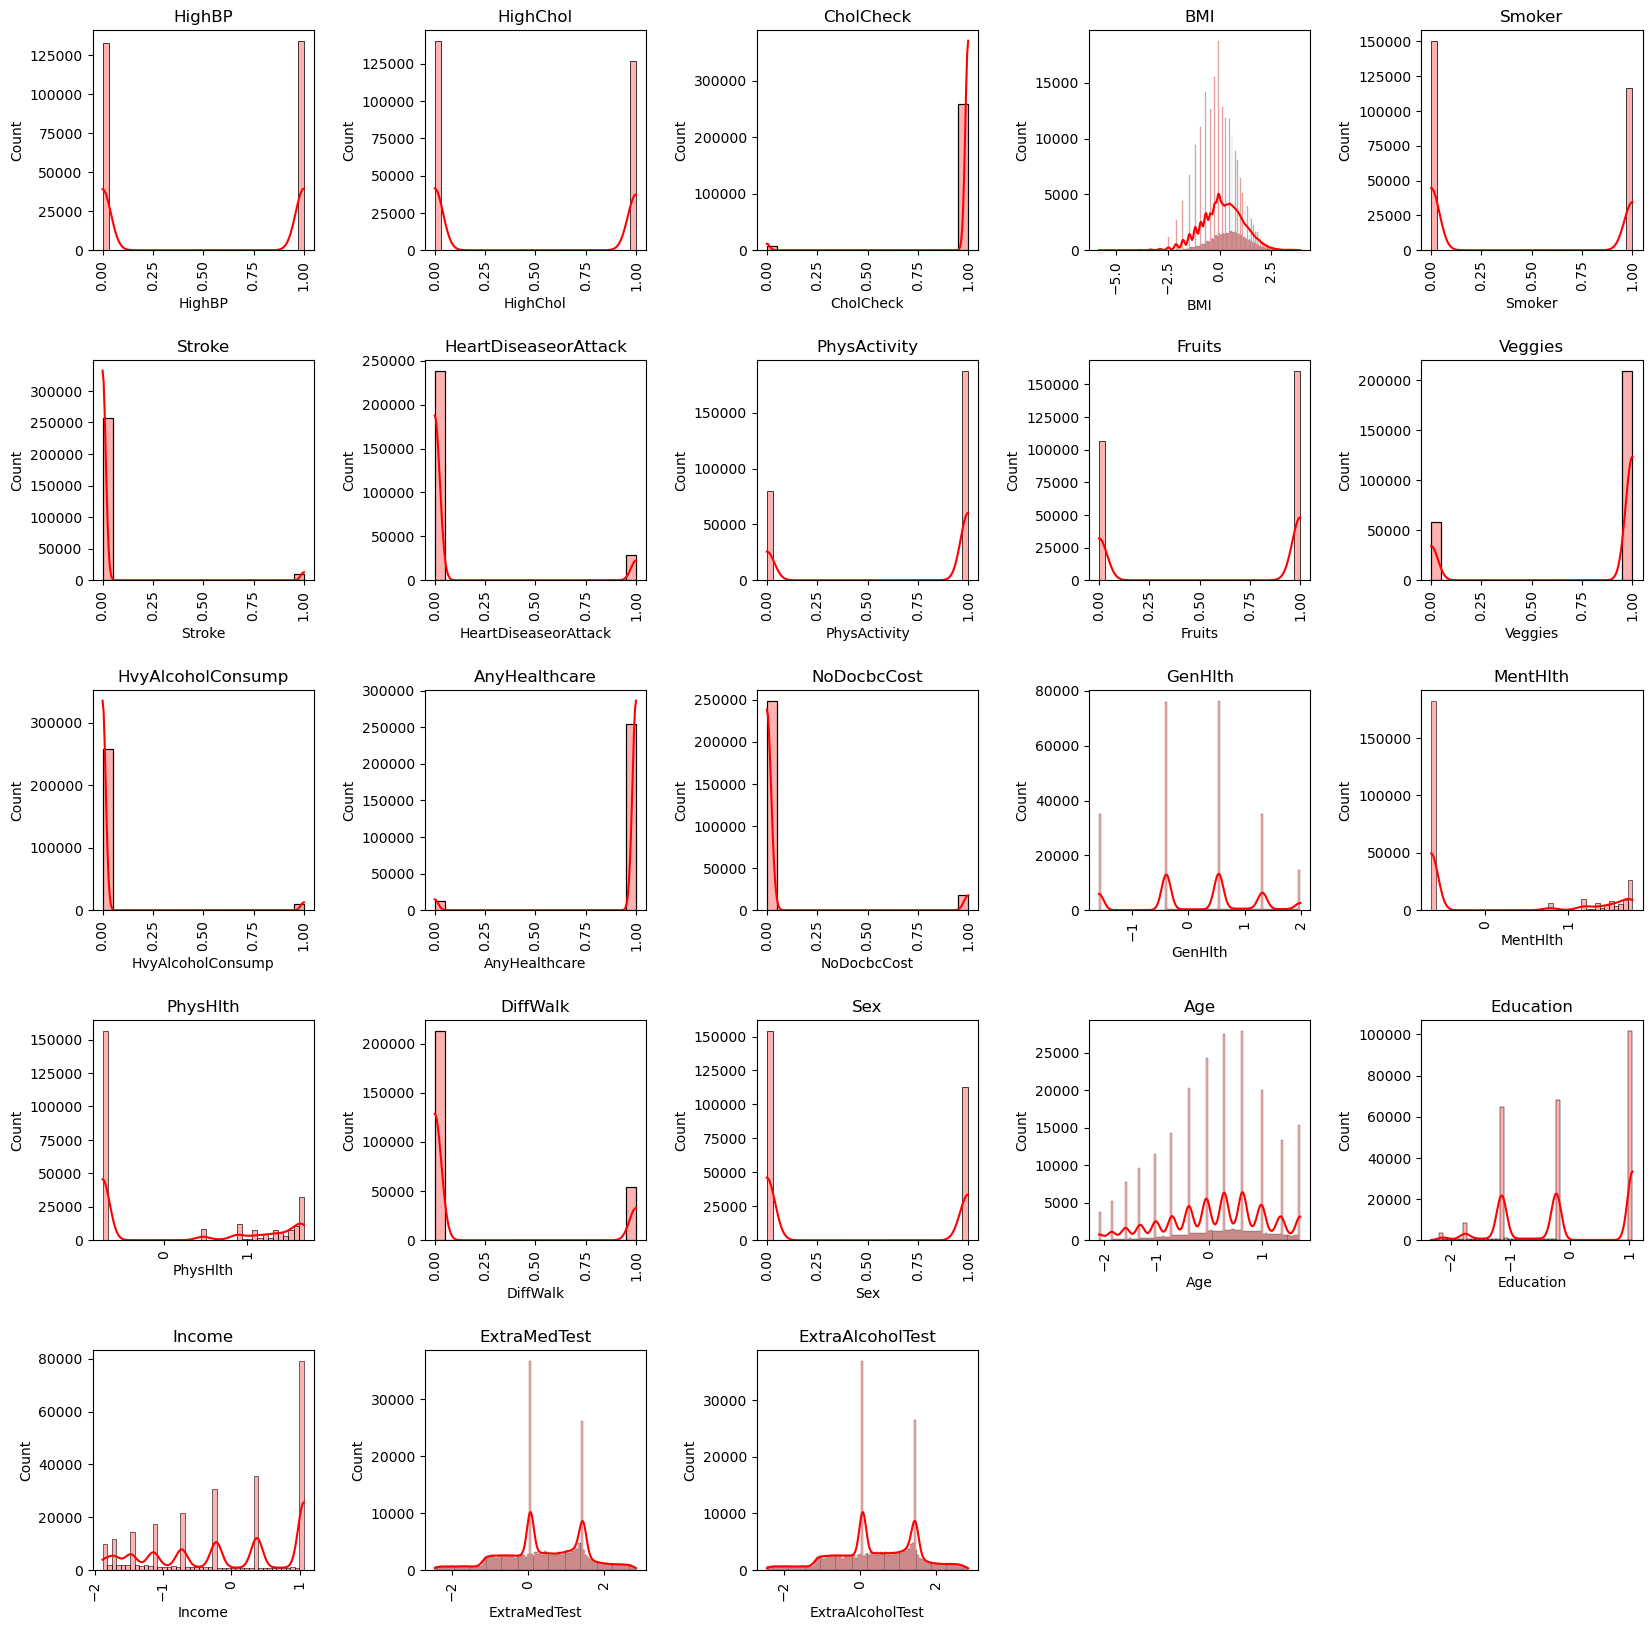

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the entire figure
plt.figure(figsize=(20, 20))

for i, col in enumerate(X_train_balanced.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(X_train_balanced[col], kde=True, color='r', alpha=0.3)
    plt.title(col)
    plt.xticks(rotation='vertical')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.show()

In [27]:
X_train_balanced.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,...,267318.000000,267318.000000,267318.000000,267318.000000,267318.00000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000
mean,0.502918,0.474461,0.970256,0.159622,0.436873,0.036795,0.106828,0.702197,0.600506,0.783789,...,0.200073,0.024809,0.106673,0.203062,0.42283,0.128137,-0.088090,-0.116425,0.435719,0.438078
std,0.499992,0.499348,0.169879,0.988417,0.496000,0.188259,0.308895,0.457293,0.489795,0.411660,...,0.995394,1.017139,1.041126,0.402279,0.49401,0.947420,1.002544,1.009764,1.082718,1.082660
min,0.000000,0.000000,0.000000,-5.803810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.586428,-0.658199,-0.741057,0.000000,0.00000,-2.095158,-2.326883,-1.882151,-2.441710,-2.439967
25%,0.000000,0.000000,1.000000,-0.445435,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-0.393778,-0.658199,-0.741057,0.000000,0.00000,-0.389889,-1.142921,-1.140521,-0.219344,-0.213520
50%,1.000000,0.000000,1.000000,0.133907,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.538841,-0.658199,-0.741057,0.000000,0.00000,0.281502,-0.225037,-0.222036,0.365786,0.369144
75%,1.000000,1.000000,1.000000,0.826171,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.725205,1.195390,1.313379,0.000000,1.00000,0.823848,1.054110,1.059084,1.372039,1.378976
max,1.000000,1.000000,1.000000,3.887577,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.988315,1.780789,1.686154,1.000000,1.00000,1.728691,1.054110,1.059084,2.838583,2.835036


## Correlation plot

In [28]:
# Create a DataFrame from the balanced and normalized features
df_train_balanced = pd.DataFrame(X_train_balanced, columns=[col for col in X_train_balanced.columns])

# Add the target variable
df_train_balanced['Status'] = y_train_balanced

In [29]:
df_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267318 entries, 0 to 267317
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                267318 non-null  int64  
 1   HighChol              267318 non-null  int64  
 2   CholCheck             267318 non-null  int64  
 3   BMI                   267318 non-null  float64
 4   Smoker                267318 non-null  int64  
 5   Stroke                267318 non-null  int64  
 6   HeartDiseaseorAttack  267318 non-null  int64  
 7   PhysActivity          267318 non-null  int64  
 8   Fruits                267318 non-null  int64  
 9   Veggies               267318 non-null  int64  
 10  HvyAlcoholConsump     267318 non-null  int64  
 11  AnyHealthcare         267318 non-null  int64  
 12  NoDocbcCost           267318 non-null  int64  
 13  GenHlth               267318 non-null  float64
 14  MentHlth              267318 non-null  float64
 15  

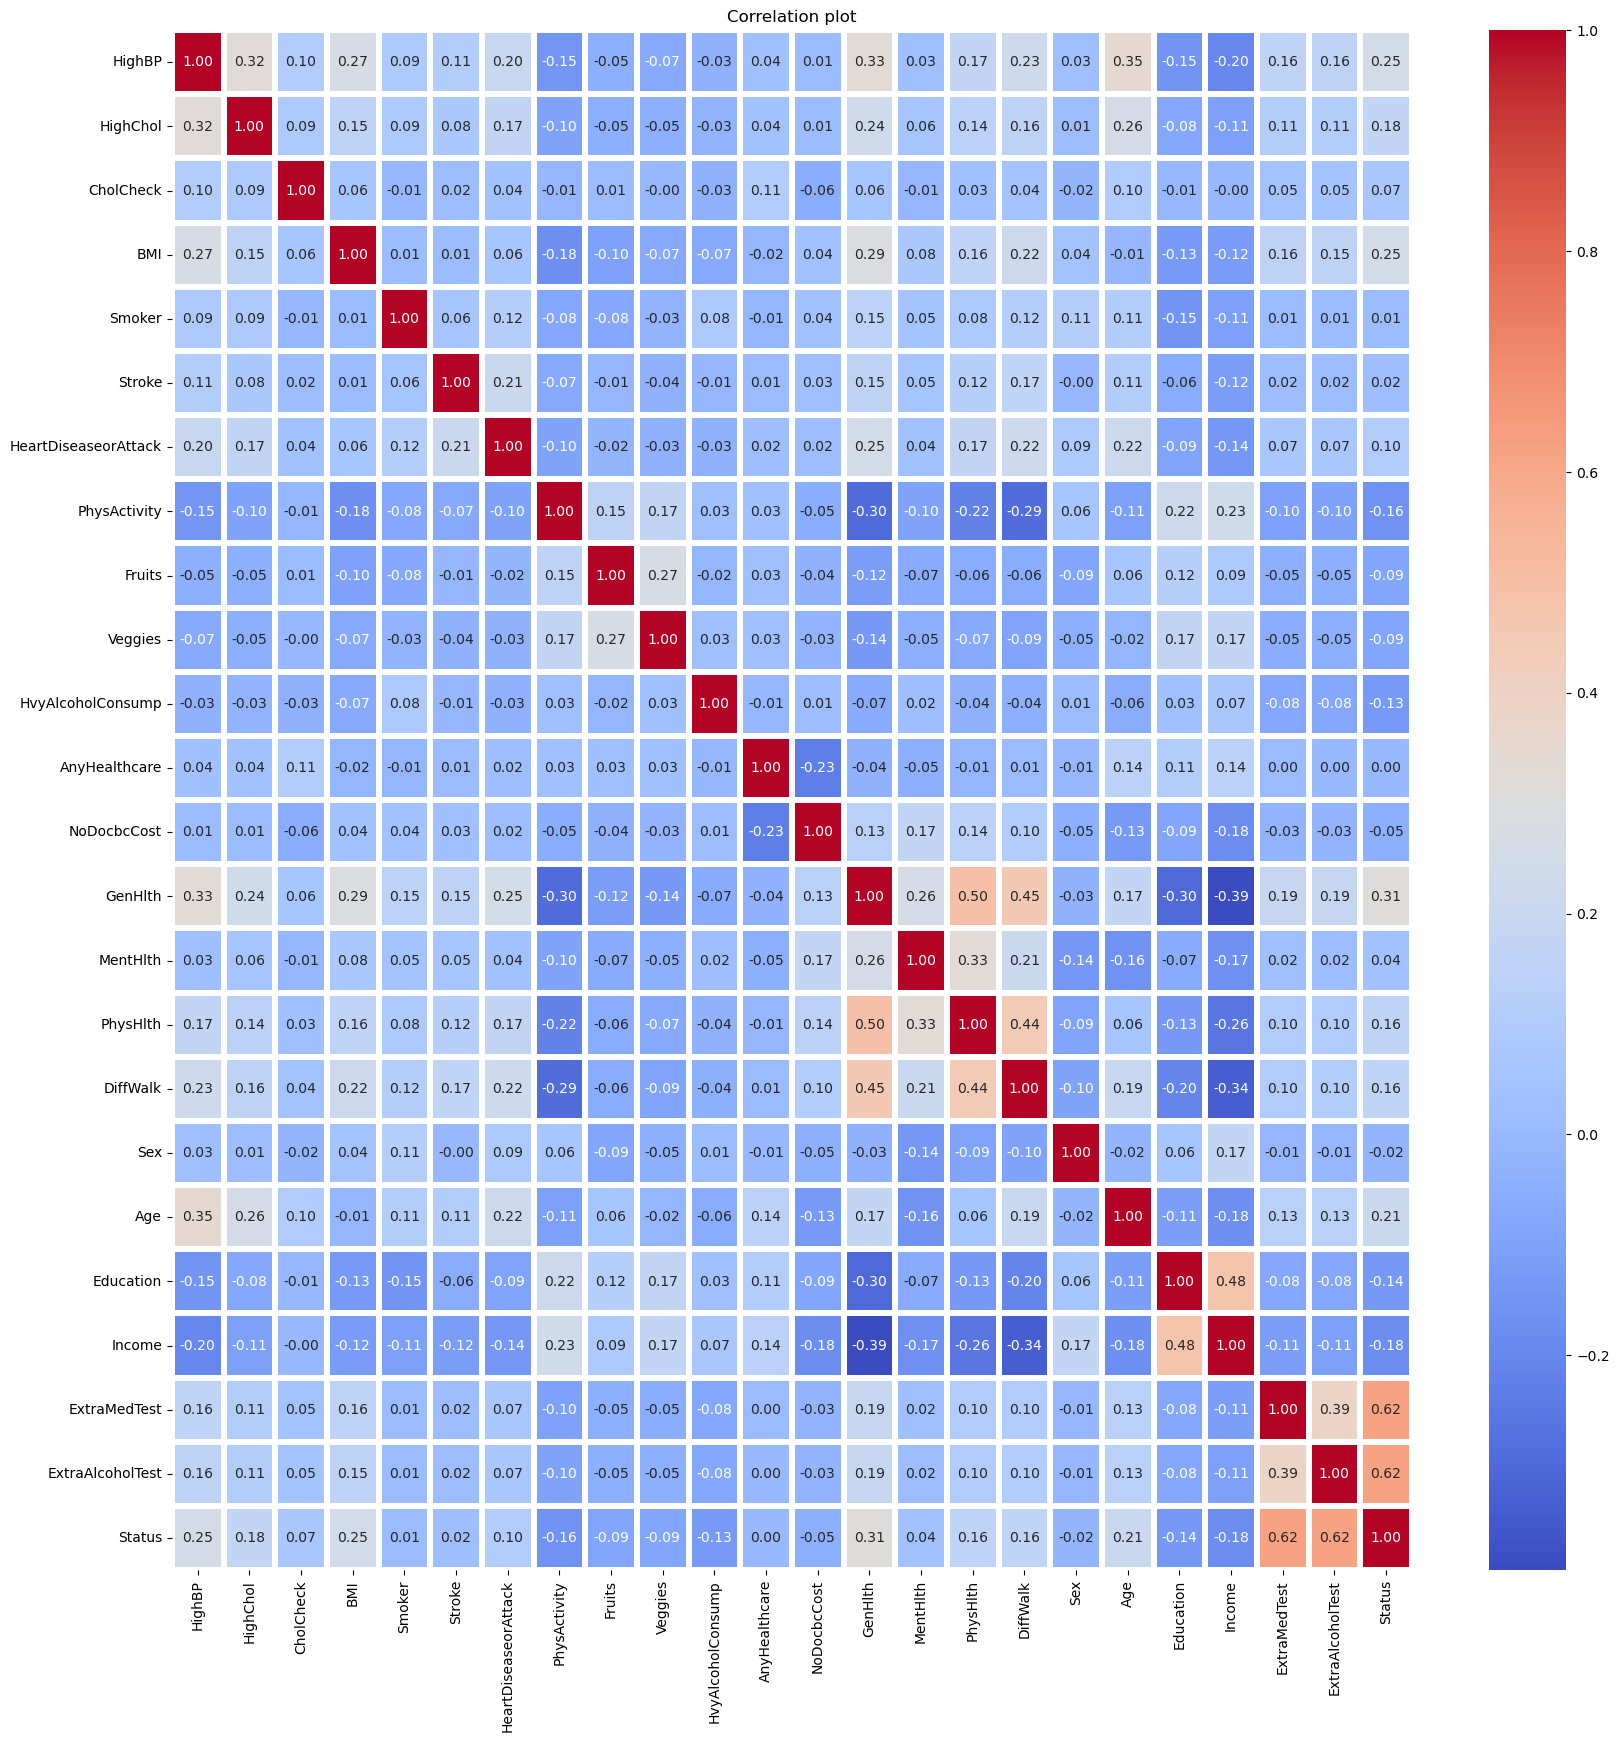

In [30]:
# plot correlation plot to explore correlation between columns
fig, ax = plt.subplots(figsize=(20,20))         
corr_plot = sns.heatmap(df_train_balanced.corr(), annot = True,linewidths=3, fmt=".2f", cmap='coolwarm')
plt.title("Correlation plot")
plt.show()

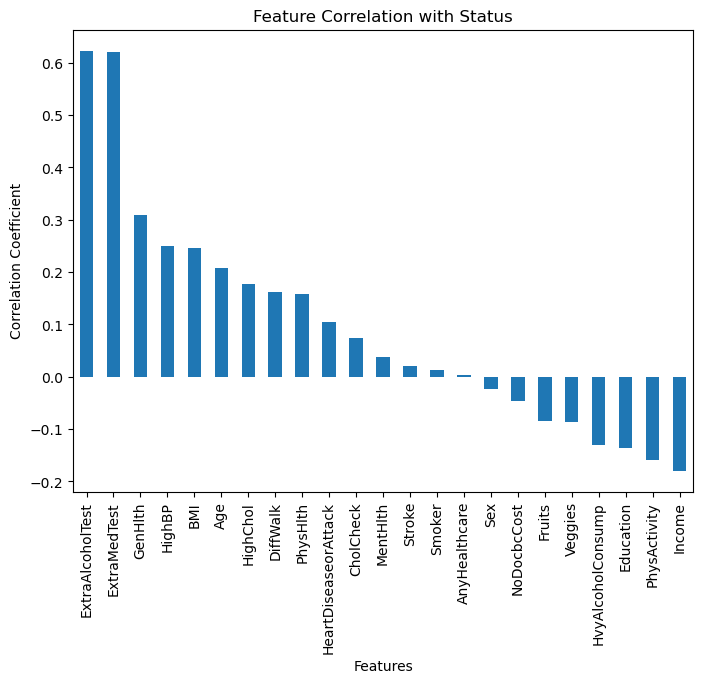

In [31]:
# Isolate the target correlations
corr_matrix = df_train_balanced.corr()
target_corr = corr_matrix['Status'].sort_values(ascending=False)

# Plotting correlations with the target
plt.figure(figsize=(8, 6))
target_corr.drop('Status').plot(kind='bar')
plt.title('Feature Correlation with Status')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

'CholCheck', 'MenHlth', 'Stroke', 'AnyHealthcare', 'Sex' 'NoDocbcCost', 'Fruits', 'Veggies' have neglectable correlation to the target feature 'Status'  **$(-0.1 \le corr_eff \le 0.1)$**. Hence, I will drop these columns.

In [68]:
# for i, col in target_corr.iteritems():
#     print(i, col)

In [32]:
#select features to drop due to neglectable correlations
for feature, corr_eff in target_corr.iteritems():
    if -0.1 < corr_eff < 0.1:
        if feature in df_train_balanced:    
            df_train_balanced.drop(feature, axis = 1, inplace = True)
        if feature in val_X:
            val_X.drop(feature, axis = 1, inplace = True)

In [33]:
df_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267318 entries, 0 to 267317
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                267318 non-null  int64  
 1   HighChol              267318 non-null  int64  
 2   BMI                   267318 non-null  float64
 3   HeartDiseaseorAttack  267318 non-null  int64  
 4   PhysActivity          267318 non-null  int64  
 5   HvyAlcoholConsump     267318 non-null  int64  
 6   GenHlth               267318 non-null  float64
 7   PhysHlth              267318 non-null  float64
 8   DiffWalk              267318 non-null  int64  
 9   Age                   267318 non-null  float64
 10  Education             267318 non-null  float64
 11  Income                267318 non-null  float64
 12  ExtraMedTest          267318 non-null  float64
 13  ExtraAlcoholTest      267318 non-null  float64
 14  Status                267318 non-null  int64  
dtype

In [34]:
# Save our newly processed data into separate datasets
df_train_balanced.to_csv("./data/df_train_balanced.csv", index=False)
val_X.to_csv("./data/val_X.csv", index=False)

In [35]:
df_train_balanced.describe()

,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000
mean,0.502918,0.474461,0.159622,0.106828,0.702197,0.036193,0.200073,0.106673,0.203062,0.128137,-0.088090,-0.116425,0.435719,0.438078,0.500000
std,0.499992,0.499348,0.988417,0.308895,0.457293,0.186770,0.995394,1.041126,0.402279,0.947420,1.002544,1.009764,1.082718,1.082660,0.500001
min,0.000000,0.000000,-5.803810,0.000000,0.000000,0.000000,-1.586428,-0.741057,0.000000,-2.095158,-2.326883,-1.882151,-2.441710,-2.439967,0.000000
25%,0.000000,0.000000,-0.445435,0.000000,0.000000,0.000000,-0.393778,-0.741057,0.000000,-0.389889,-1.142921,-1.140521,-0.219344,-0.213520,0.000000
50%,1.000000,0.000000,0.133907,0.000000,1.000000,0.000000,0.538841,-0.741057,0.000000,0.281502,-0.225037,-0.222036,0.365786,0.369144,0.500000
75%,1.000000,1.000000,0.826171,0.000000,1.000000,0.000000,0.725205,1.313379,0.000000,0.823848,1.054110,1.059084,1.372039,1.378976,1.000000
max,1.000000,1.000000,3.887577,1.000000,1.000000,1.000000,1.988315,1.686154,1.000000,1.728691,1.054110,1.059084,2.838583,2.835036,1.000000


# Model Development

Now after pre-process the datasets, we are now able to train the model.

In [36]:
# Extract data
df_train_balanced = pd.read_csv('./data/df_train_balanced.csv')
val_X = pd.read_csv('./data/val_X.csv')
val_Y = pd.read_csv('./data/val_Y.csv')

In [37]:
train_X = df_train_balanced.drop('Status', axis = 1)
train_Y = df_train_balanced['Status']

In [38]:
print(f"train_X shape: {train_X.shape}")
print(f"train_Y shape: {train_Y.shape}")
print(f"val_X shape: {val_X.shape}")
print(f"val_y shape: {val_Y.shape}")
print("train Y value")
print(train_Y.value_counts())
print("val Y value")
print(val_Y.value_counts())

train_X shape: (267318, 14)
train_Y shape: (267318,)
val_X shape: (40589, 14)
val_y shape: (40589, 1)
train Y value
0    133659
1    133659
Name: Status, dtype: int64
val Y value
Status
0         33463
1          7126
dtype: int64


In [39]:
train_X.describe()

,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000,267318.000000
mean,0.502918,0.474461,0.159622,0.106828,0.702197,0.036193,0.200073,0.106673,0.203062,0.128137,-0.088090,-0.116425,0.435719,0.438078
std,0.499992,0.499348,0.988417,0.308895,0.457293,0.186770,0.995394,1.041126,0.402279,0.947420,1.002544,1.009764,1.082718,1.082660
min,0.000000,0.000000,-5.803810,0.000000,0.000000,0.000000,-1.586428,-0.741057,0.000000,-2.095158,-2.326883,-1.882151,-2.441710,-2.439967
25%,0.000000,0.000000,-0.445435,0.000000,0.000000,0.000000,-0.393778,-0.741057,0.000000,-0.389889,-1.142921,-1.140521,-0.219344,-0.213520
50%,1.000000,0.000000,0.133907,0.000000,1.000000,0.000000,0.538841,-0.741057,0.000000,0.281502,-0.225037,-0.222036,0.365786,0.369144
75%,1.000000,1.000000,0.826171,0.000000,1.000000,0.000000,0.725205,1.313379,0.000000,0.823848,1.054110,1.059084,1.372039,1.378976
max,1.000000,1.000000,3.887577,1.000000,1.000000,1.000000,1.988315,1.686154,1.000000,1.728691,1.054110,1.059084,2.838583,2.835036


In [40]:
val_X.describe()

,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,40589.000000,40589.00000,40589.000000,40589.000000,40589.000000,40589.000000,40589.000000,40589.000000,40589.000000,40589.000000,40589.000000,40589.000000,40589.000000,40589.000000
mean,0.432802,0.42647,-0.004667,0.093597,0.758802,0.056567,-0.001219,-0.001356,0.166227,0.010479,-0.001765,-0.000210,0.000362,-0.000671
std,0.495470,0.49457,0.996367,0.291271,0.427816,0.231016,0.992199,0.996700,0.372289,0.998088,0.997816,0.990667,1.009978,1.001302
min,0.000000,0.00000,-5.059052,0.000000,0.000000,0.000000,-1.586428,-0.741057,0.000000,-2.095158,-2.326883,-1.882151,-2.441710,-2.439967
25%,0.000000,0.00000,-0.667796,0.000000,1.000000,0.000000,-0.393778,-0.741057,0.000000,-0.710006,-1.142921,-0.725544,-0.635504,-0.645615
50%,0.000000,0.00000,-0.046100,0.000000,1.000000,0.000000,-0.393778,-0.741057,0.000000,-0.059088,-0.225037,0.372193,0.067901,0.070412
75%,1.000000,1.00000,0.609584,0.000000,1.000000,0.000000,0.538841,1.094758,0.000000,0.631149,1.054110,1.059084,0.629050,0.616776
max,1.000000,1.00000,3.887577,1.000000,1.000000,1.000000,1.988315,1.686154,1.000000,1.728691,1.054110,1.059084,2.838583,2.835036


## Logisic Regression with linear features, No regularization applied

In [60]:
# Construct the logistic regression model
baseline_logReg = LogisticRegression(
    penalty='none',             # No regularization
    # class_weight="balanced",  # Because our training data is imbalanced
    max_iter=500,
    random_state=99           # Reproducible result)
)
baseline_logReg.fit(train_X, train_Y)

# The intercept and coefficients
print(baseline_logReg.intercept_)
print(baseline_logReg.coef_)

[-1.85390034]
[[ 0.36152516  0.22564035  0.36356192 -0.16680086 -0.21671526 -1.42128589
   0.44176187  0.01749336 -0.21822467  0.30304203 -0.03754879 -0.07509586
   1.83415571  1.87333084]]


In [61]:
# predict the test data
baseline_pred_Y = baseline_logReg.predict(val_X)

In [62]:
print(baseline_pred_Y)

[0 1 0 ... 1 1 1]


In [63]:
baseline_pred_train_Y = baseline_logReg.predict(train_X)
baseline_performance_report = classification_report(train_Y, baseline_pred_train_Y)
print(baseline_performance_report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89    133621
           1       0.89      0.88      0.89    133621

    accuracy                           0.89    267242
   macro avg       0.89      0.89      0.89    267242
weighted avg       0.89      0.89      0.89    267242



In [64]:
baseline_performance_report = classification_report(val_Y, baseline_pred_Y)
print(baseline_performance_report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     33463
           1       0.63      0.87      0.73      7126

    accuracy                           0.89     40589
   macro avg       0.80      0.88      0.83     40589
weighted avg       0.91      0.89      0.89     40589



Our first trained model have a great F1 score on class 0 but low 1. Hence, our model might become bias due to the class imbalance. Hence, I will apply some regulization methods to further develop other models.

## Cross Validation 

Setting up K-Fold cross validation

In [149]:
cv = KFold(
    n_splits=5,    
    shuffle=True,
    random_state=99  # Reproducible result
)

testing with another CV

In [127]:
# Class Weight
# Total number of samples in the validation set
total_samples = len(val_Y)  # Correct way to get the total number of samples

# Frequency of each class in the validation set
class_counts = val_Y.value_counts()
# print(class_counts)
freq_0 = class_counts[0] / total_samples
freq_1 = class_counts[1] / total_samples

# Inverse of frequencies as weights
weight_for_0 = 1 / freq_0
weight_for_1 = 1 / freq_1

# Normalize weights
sum_weights = weight_for_0 + weight_for_1
normalized_weight_0 = weight_for_0 / sum_weights
normalized_weight_1 = weight_for_1 / sum_weights

weights = {0: normalized_weight_0, 1: normalized_weight_1}

print(weights)


{0: 0.17556480819926581, 1: 0.8244351918007342}


In [164]:
# Define hyperparameters
params = {
    'C': np.logspace(-4, 2, num=50),  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear']
}

In [66]:
# # Cost-sensitive Training
# sample_weights = [5 if i == 1 else 1 for i in train_Y]  # Example weights
# weights = {0: 1, 1: 5}  # For example, make class 1's weight 5 times that of class 0
# solvers = ['liblinear', 'saga']

# Logistic Regression with Linear Features

In [165]:
# Define the logistic regression model
logreg = LogisticRegression(
    class_weight="balanced",
    max_iter=500,
    random_state=99
)

In [166]:
# Fit the model
grid_logreg1 = GridSearchCV(logreg, params, cv=cv, scoring=["f1_weighted", "roc_auc"], refit="f1_weighted", return_train_score=True)
grid_logreg1.fit(train_X, train_Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=99),
             param_grid={'C': array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32995181e-04,
       3.08884360e-04, 4.09491506e-04, 5.42867544e-04, 7.19685673e-04,
       9.54095476e-04, 1.26485522e-03, 1.67683294e-03, 2.22299648e-03,
       2...
       8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
       2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
       7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
       2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
       7.54312006e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             refit='f1_weighted', return_train_score=True,
             scoring=['f1_weighted', 'roc_auc'])

In [167]:
# Get predictions
logreg1_train_pred_Y = grid_logreg1.predict(train_X)
logreg1_val_pred_Y = grid_logreg1.predict(val_X)

In [168]:
grid_logreg1.best_params_

{'C': 1.0985411419875573, 'penalty': 'l2', 'solver': 'liblinear'}

In [169]:
print("TRAIN")
print(classification_report(train_Y, logreg1_train_pred_Y))

TRAIN
              precision    recall  f1-score   support

           0       0.88      0.89      0.89    133659
           1       0.89      0.88      0.89    133659

    accuracy                           0.89    267318
   macro avg       0.89      0.89      0.89    267318
weighted avg       0.89      0.89      0.89    267318



In [170]:
print("VALIDATION")
print(classification_report(val_Y, logreg1_val_pred_Y))

VALIDATION
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     33463
           1       0.63      0.87      0.73      7126

    accuracy                           0.89     40589
   macro avg       0.80      0.88      0.83     40589
weighted avg       0.91      0.89      0.89     40589



In [171]:
# Optionally calculate ROC-AUC
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(train_Y, logreg1_train_pred_Y)
val_auc = roc_auc_score(val_Y, logreg1_val_pred_Y)
print(train_auc)
print(val_auc)

0.886236617062824
0.8786157526425126


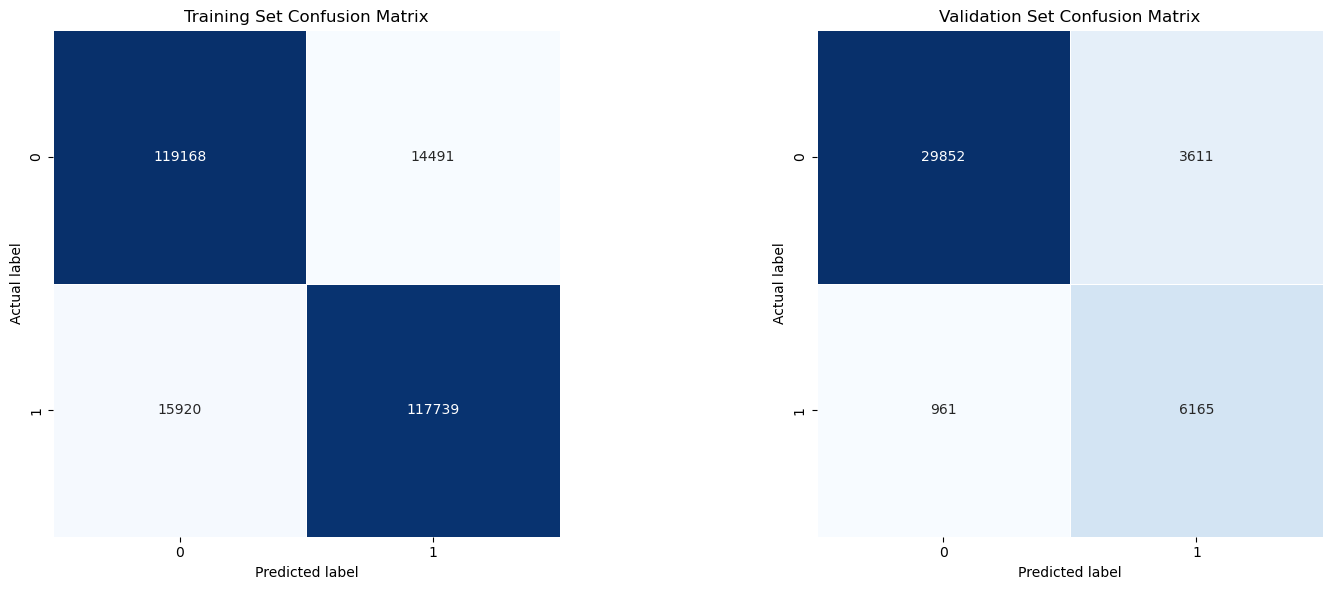

In [172]:
cm_train = confusion_matrix(train_Y, logreg1_train_pred_Y)
cm_val = confusion_matrix(val_Y, logreg1_val_pred_Y)

# Setting up the matplotlib figure (1 row, 2 columns)
plt.figure(figsize=(16, 6))

# Plotting the training set confusion matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(cm_train, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Training Set Confusion Matrix')

# Plotting the validation set confusion matrix
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(cm_val, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Validation Set Confusion Matrix')

# Show the plot
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

# Logistic Regression with 2nd Order Polynomial Features

In [73]:
# Degree 2 Polynomial Features:
poly = PolynomialFeatures(2)
train_X_poly2 = poly.fit_transform(train_X)
val_X_poly2 = poly.transform(val_X)

# We need to scale the data again after transforming it to polynomial features
scaler = StandardScaler()
train_X_poly2 = scaler.fit_transform(train_X_poly2)
val_X_poly2 = scaler.transform(val_X_poly2)

In [74]:
grid_logreg2 = GridSearchCV(logreg, params, cv=cv, scoring=["f1", "roc_auc"], refit="f1", return_train_score=True)
grid_logreg2.fit(train_X_poly2, train_Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=0),
             param_grid={'C': array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32995181e-04,
       3.08884360e-04, 4.09491506e-04, 5.42867544e-04, 7.19685673e-04,
       9.54095476e-04, 1.26485522e-03, 1.67683294e-03, 2.22299648e-03,
       2....
       8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
       2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
       7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
       2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
       7.54312006e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             refit='f1', return_train_score=True, scoring=['f1', 'roc_auc'])

In [75]:
train_pred_y_poly2 = grid_logreg2.predict(train_X_poly2)
val_pred_y_poly2 = grid_logreg2.predict(val_X_poly2)

In [76]:
grid_logreg2.best_params_

{'C': 0.028117686979742307, 'penalty': 'l1', 'solver': 'liblinear'}

In [77]:
print("TRAIN")
print(classification_report(train_Y, train_pred_y_poly2))

TRAIN
              precision    recall  f1-score   support

           0       0.89      0.91      0.90    133621
           1       0.91      0.89      0.90    133621

    accuracy                           0.90    267242
   macro avg       0.90      0.90      0.90    267242
weighted avg       0.90      0.90      0.90    267242



In [78]:
print("VALIDATION")
print(classification_report(val_Y, val_pred_y_poly2))

VALIDATION
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     33463
           1       0.67      0.87      0.75      7126

    accuracy                           0.90     40589
   macro avg       0.82      0.89      0.85     40589
weighted avg       0.92      0.90      0.90     40589



**Remark** : After training two logistic regression models (poly1 and poly2), we observe that models have bias due to the imbalance class in the validation sets. Hence, to solve this problem, we will next try to tune our threshold.

Note that we will re-use our model we have trained before but with a change in threshold.

## Tuning the Threshold

In [173]:
# Define a Range of Thresholds
thresholds = np.linspace(0, 1, num=100)  # 50 thresholds spaced evenly from 0 to 1

In [174]:
from sklearn.metrics import f1_score
def threshold_tuning(train_probabilities, val_probabilities, train_Y, val_Y):
    train_f1_scores = []
    val_f1_scores = []
    for thresh in thresholds:
        # Apply threshold to positive class probabilities to create binary predictions
        train_preds = (train_probabilities >= thresh).astype(int)
        val_preds = (val_probabilities >= thresh).astype(int)
        
        # Calculate the F1 score at this threshold for both sets
        train_f1 = f1_score(train_Y, train_preds)
        val_f1 = f1_score(val_Y, val_preds)
        
        train_f1_scores.append(train_f1)
        val_f1_scores.append(val_f1)
        
    return train_f1_scores, val_f1_scores

In [161]:
from sklearn.metrics import f1_score
def threshold_tuning_with_val(val_probabilities, val_Y):
    # Initialize variables to track the best threshold
    optimal_threshold = 0.5
    best_combined_f1 = 0
    f1_scores_1 = []
    f1_scores_0 = []
    
    # Search for the threshold that balances F1-scores and maintains their height
    for thresh in thresholds:
        # Convert probabilities to binary predictions using the threshold
        val_preds = (val_probabilities >= thresh).astype(int)
        
        # Calculate F1 scores for each class
        f1_score_0 = f1_score(val_Y, val_preds, pos_label=0)
        f1_score_1 = f1_score(val_Y, val_preds, pos_label=1)
        f1_scores_1.append(f1_score_1)
        f1_scores_0.append(f1_score_0)
        
        # Calculate the average F1-score and the difference
        avg_f1_score = (f1_score_0 + f1_score_1) / 2
        f1_diff = abs(f1_score_0 - f1_score_1)
        
        # Combine metrics: you could tweak how much weight you give to the difference
        combined_f1 = avg_f1_score - (f1_diff / 2)  # Example: subtracting half the difference
        
        # Update the optimal threshold if the combined metric is improved
        if combined_f1 > best_combined_f1:
            best_combined_f1 = combined_f1
            optimal_threshold = thresh
    
    return optimal_threshold, f1_scores_1, f1_scores_0


## Tuning threshold with LogReg1

In [175]:
# Predict probabilities of logreg1
train_probs_logreg1 = grid_logreg1.predict_proba(train_X)[:, 1] # Probabilities 
val_probs_logreg1 = grid_logreg1.predict_proba(val_X)[:, 1] # Probabilities 

In [176]:
# # Option 1: Maximize validation F1-score directly
# optimal_index = np.argmax(val_f1_scores)
# optimal_threshold = thresholds[optimal_index]

# Option 2: Find the best compromise between train and validation F1-scores
# This could be defined as the minimal difference between train and validation F1 scores
# along with a high enough F1 score on the validation set
train_f1_scores, val_f1_scores = threshold_tuning(train_probs_logreg1, val_probs_logreg1, train_Y, val_Y)
f1_diff = np.abs(np.array(train_f1_scores) - np.array(val_f1_scores))
combined_score = np.array(val_f1_scores) - f1_diff  # Example metric to balance both
optimal_index = np.argmax(combined_score)
optimal_threshold = thresholds[optimal_index]

print(f"Optimal threshold: {optimal_threshold}")


Optimal threshold: 0.8484848484848485


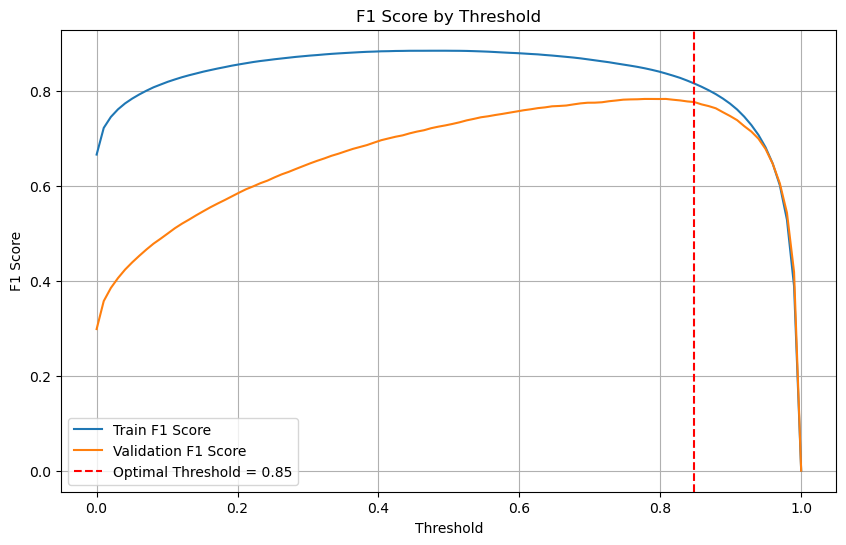

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, train_f1_scores, label='Train F1 Score')
plt.plot(thresholds, val_f1_scores, label='Validation F1 Score')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.title('F1 Score by Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()


In [178]:
print("TRAIN")
print(classification_report(train_Y, train_preds))

TRAIN
              precision    recall  f1-score   support

           0       0.77      0.98      0.86    133659
           1       0.97      0.70      0.82    133659

    accuracy                           0.84    267318
   macro avg       0.87      0.84      0.84    267318
weighted avg       0.87      0.84      0.84    267318



In [179]:
print("VALIDATION")
print(classification_report(val_Y, val_preds))

VALIDATION
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     33463
           1       0.89      0.69      0.78      7126

    accuracy                           0.93     40589
   macro avg       0.91      0.84      0.87     40589
weighted avg       0.93      0.93      0.93     40589



In [162]:
optimal_threshold_val, f1_scores_1, f1_scores_0 = threshold_tuning_with_val(val_probs_logreg1, val_Y)

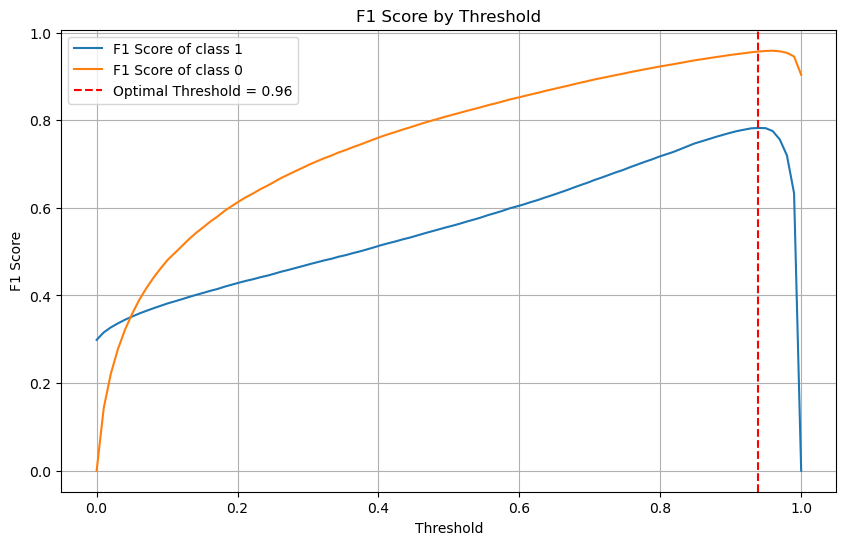

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores_1, label='F1 Score of class 1')
plt.plot(thresholds, f1_scores_0, label='F1 Score of class 0')
plt.axvline(x=optimal_threshold_val, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.title('F1 Score by Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()


## Tuning ThreshHold with LogReg2

In [ ]:
# Predict probabilities of logreg1
train_probs_logreg2 = grid_logreg1.predict_proba(train_X)[:, 1] # Probabilities 
val_probs_logreg2 = grid_logreg1.predict_proba(val_X)[:, 1] # Probabilities 

In [ ]:
# # Option 1: Maximize validation F1-score directly
# optimal_index = np.argmax(val_f1_scores)
# optimal_threshold = thresholds[optimal_index]

# Option 2: Find the best compromise between train and validation F1-scores
# This could be defined as the minimal difference between train and validation F1 scores
# along with a high enough F1 score on the validation set
train_f1_scores, val_f1_scores = threshold_tuning(train_probs_logreg1, val_probs_logreg1, train_Y, val_Y)
f1_diff = np.abs(np.array(train_f1_scores) - np.array(val_f1_scores))
combined_score = np.array(val_f1_scores) - f1_diff  # Example metric to balance both
optimal_index = np.argmax(combined_score)
optimal_threshold = thresholds[optimal_index]

print(f"Optimal threshold: {optimal_threshold}")

# Logistic Regression with 3nd Order Polynomial Features

In [319]:
# Degree 2 Polynomial Features:
poly = PolynomialFeatures(3)
train_X_poly3 = poly.fit_transform(train_X)
val_X_poly3 = poly.transform(val_X)

# We need to scale the data again after transforming it to polynomial features
scaler = StandardScaler()
train_X_poly3 = scaler.fit_transform(train_X_poly3)
val_X_poly3 = scaler.transform(val_X_poly3)

In [ ]:
grid_logreg3 = GridSearchCV(logreg, params, cv=cv, scoring=["f1", "roc_auc"], refit="f1", return_train_score=True)
grid_logreg3.fit(train_X_poly3, train_Y)

train_pred_y_poly3 = grid_logreg3.predict(train_X_poly3)
val_pred_y_poly3 = grid_logreg3.predict(val_X_poly3)

In [ ]:
grid_logreg3.best_params_

In [ ]:
print("TRAIN")
print(classification_report(train_Y, train_pred_y_poly3))

In [ ]:
print("VALIDATION")
print(classification_report(val_Y, val_pred_y_poly3))